In [11]:
#100 iteraciones cada una de ellas con 100 partidas
#Inician sin puntos ambos jugadores
#---------Cuando Ganan
#Mano = 7.5
#Mas se acerca al 7.5 por debajo
#Si existe empate gana el invitado
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def mensaje_inicio():
    print("     _                 _            _             ")
    print(" ___(_)_ __ ___  _   _| | __ _  ___(_) ___  _ __  ")
    print("/ __| | '_ ` _ \| | | | |/ _` |/ __| |/ _ \| '_ \ ")
    print("\__ \ | | | | | | |_| | | (_| | (__| | (_) | | | |")
    print("|___/_|_| |_| |_|\__,_|_|\__,_|\___|_|\___/|_| |_|")
    print("               JUEGO SIETE Y MEDIO                ")
    print("                   GRUPO Nro 9                    ")
    print()                           

cont = 0 #Almacena las veces que gana la casa
cont1 = 0 #Almacena las veces que gana el jugador
simulaciones = 10 #Aqui se coloca el numero de simulaciones a ejecutar

#Funcion que baraja las cartas
def mezclar_baraja():
    baraja = [1, 2, 3, 4, 5, 6, 7, "sota", "caballo", "rey"] * 4 #baraja de 40 cartas
    random.shuffle(baraja)
    return baraja

#Funcion que transforma las cartas con figuras en medio punto
def valor_carta(carta):
    if carta in ["sota", "caballo", "rey"]:
        return 0.5
    else:
        return carta

#Esta funcion suma el valor de las cartas en la mano
def valor_mano(lista):
    if lista == []:
        return 0
    else:
        return valor_carta(lista[0]) + valor_mano(lista[1:])

#Funcion para obtener los puntajes
def obtener_puntaje(cartas):
    return valor_mano(cartas)

#Funcion para que la casa realize estrategia del medio punto
def estrategia_medio_punto(cartas):
    return valor_mano(cartas)+0.5
    
#Funcion para los turnos del jugador
def turno_jugador(cartas):
    if obtener_puntaje(cartas[0]) <= 5.5:
        return turno_jugador([cartas[0] + [cartas[2][0]]] + [cartas[1]] + [cartas[2][1:]])
    else:
        return cartas

#Funcion para los turnos de la casa
def turno_casa(cartas):
    if obtener_puntaje(cartas[1]) <= 5.5 and obtener_puntaje(cartas[0]) <= 7.5:
        return turno_casa([cartas[0]] + [cartas[1] + [cartas[2][0]]] + [cartas[2][1:]])            
    else:
        return cartas

#Funcion que decide quien gana
def resultado(puntaje_jugador, puntaje_casa):
    if puntaje_jugador > 7.5 and puntaje_casa <= 7.5:
        gana = 0
    elif puntaje_jugador == 7.5 and (puntaje_casa > 7.5 or puntaje_casa < 7.5):
        gana = 1
    elif puntaje_jugador <= 7.5 and puntaje_casa <= 7.5 and puntaje_jugador == puntaje_casa:
        gana = 1
    elif puntaje_jugador < 7.5 and (puntaje_casa > 7.5 or puntaje_casa < puntaje_jugador):
        gana = 1
    elif puntaje_jugador < 7.5 and puntaje_casa > puntaje_jugador:
        gana = 0
    return gana

#Funcion que guia el desarrollo del juego
def juego(cartas, turnoJugadorHecho, turnoCasaHecho):
    global gana
    if cartas[2] == []:
        juego(cartas[0:2] + [mezclar_baraja()], turnoJugadorHecho, turnoCasaHecho)
    elif cartas[0] == []:
        juego([cartas[2][0:1]] + [cartas[1]] + [cartas[2][2:]], turnoJugadorHecho, turnoCasaHecho)
    elif cartas[1] == []:
        juego([cartas[2][0:1]] + [cartas[0]] + [cartas[2][1:]], turnoJugadorHecho, turnoCasaHecho)
    elif not turnoJugadorHecho:
        juego(turno_jugador(cartas), True, turnoCasaHecho)
    elif not turnoCasaHecho:
        juego(turno_casa(cartas), turnoJugadorHecho, True)        
    else:       
        gana = resultado(obtener_puntaje(cartas[0]), obtener_puntaje(cartas[1]))
    return gana

mensaje_inicio()
aux = np.zeros((10, 2))

datosAux = {'casa','jugador'}
print(datosAux)
def sim1(c1,c2, sim):
    for i in range(0,sim):
        b = juego([[], [], []], False, False)
        if b == 0:
            c1 += 1
        elif b == 1:
            c2 += 1
    return c1, c2
c = sim1(cont, cont1, simulaciones)

for i in range(10):
    f = sim1(cont, cont1, simulaciones)
    datosAux = dict(casa=f[0], jugador=f[1])
    #datosAux.add('casa'=f[0], 'jugador'=f[1])
    aux[i,0] = f[0]
    aux[i,1] = f[1]
print(aux)

     _                 _            _             
 ___(_)_ __ ___  _   _| | __ _  ___(_) ___  _ __  
/ __| | '_ ` _ \| | | | |/ _` |/ __| |/ _ \| '_ \ 
\__ \ | | | | | | |_| | | (_| | (__| | (_) | | | |
|___/_|_| |_| |_|\__,_|_|\__,_|\___|_|\___/|_| |_|
               JUEGO SIETE Y MEDIO                
                   GRUPO Nro 9                    

{'jugador', 'casa'}
[[6. 4.]
 [3. 7.]
 [7. 3.]
 [6. 4.]
 [7. 3.]
 [6. 4.]
 [7. 3.]
 [4. 6.]
 [7. 3.]
 [8. 2.]]


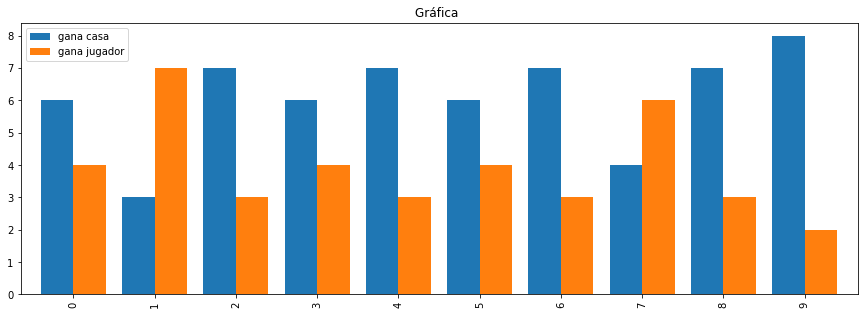

In [13]:
df1=pd.DataFrame(aux)
df1.plot(kind="bar", width=0.8, figsize=(15,5) )
plt.title("Gráfica ")
plt.legend(["gana casa", "gana jugador"])
#plt.savefig('grafica1.png')
plt.show()